In [115]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
#list of stocks in portfolio
#NOTE THAT THESE MUST BE ENTERED IN ALPHABETICAL ORDER FOR THE RESULTS TO BE CORRECT!!!
#stock = ['AAPL','AMZN','MSFT','SGEN']
stock = ['AMOT','JOUT','MLAB','USPH']

#download daily price data for each of the stocks in the portfolio
data = web.DataReader(stock,data_source="yahoo",start='10/23/2014')['Adj Close']
data.sort_index(inplace=True)

In [117]:
#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
#mean_return = returns.mean()
#return_stdev = returns.std()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stock)-1,num_portfolios))

In [118]:
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.random.random(4)
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    #calculate portfolio return and volatility
    #portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    #portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
     #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [119]:
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stock[0],stock[1],stock[2],stock[3]])

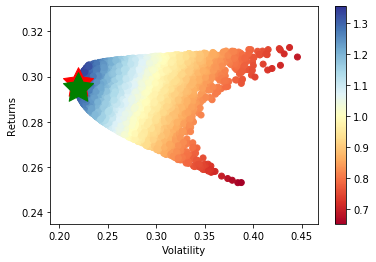

In [120]:
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [121]:
print(max_sharpe_port)

ret       0.297099
stdev     0.219553
sharpe    1.353201
AMOT      0.079906
JOUT      0.133490
MLAB      0.269993
USPH      0.516611
Name: 21466, dtype: float64


In [122]:
print(min_vol_port)

ret       0.294733
stdev     0.219045
sharpe    1.345534
AMOT      0.060239
JOUT      0.172382
MLAB      0.241674
USPH      0.525705
Name: 5615, dtype: float64
